# Tarea 5  
**Alumno:** Axel Daniel Malváez Flores  
**No.Cta:** 318315126  
**Materia:** Visualización de la Información

## Actividades

## a) Filtrado de datos: Realice la lectura del archivo “titanic3.csv” y responda las siguientes preguntas:

In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic3.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### i. ¿Cuántos cuerpos fueron encontrados?

Veamos la columna body y encontremos aquellos en los que no sean nulos sus valores

In [3]:
# We assume that 1 is yes and 0 is no
found_bodies = titanic[titanic['body'].notnull()]
print(f'Total cuerpos encontrados fueron : {len(found_bodies)}')

Total cuerpos encontrados fueron : 121


### ii. ¿Cuántos de ellos fueron hombres mayores de 40 años?

In [4]:
men_40 = found_bodies[(found_bodies['age'] > 40) & 
                      (found_bodies['sex'] == 'male')]
print(f'Total hombres sin vida mayores a 40 : {len(men_40)}')

Total hombres sin vida mayores a 40 : 39


### iii. ¿Cuántas mujeres desaparecieron entre las edades de 15 a 35 años?

Supondremos que las mujeres desaparecidas fueron aquellas que no sobrevivieron y cuyo valor en cuerpo es nulo

In [5]:
disappeared_women = titanic[(titanic['sex'] == 'female') & 
                            (titanic['survived'] == 0) & 
                            (titanic['body'].isnull()) &
                            (titanic['age'] >= 15) & (titanic['age'] <= 35)]
print(f'Total de mujeres desaparecidas entre 15 y 35 años : {len(disappeared_women)}')

Total de mujeres desaparecidas entre 15 y 35 años : 51


### iv. ¿Cuántos hombres mayores de 20 años sobrevivieron?

In [6]:
survivor_20 = titanic[(titanic['sex'] == 'male') & 
                      (titanic['age'] > 20) & 
                      (titanic['survived'] == 1) ]

print(f'Total de hombres mayores de 20 años que sobrevivieron : {len(survivor_20)}')

Total de hombres mayores de 20 años que sobrevivieron : 96


### v. ¿Cuántas mujeres menores de 25 años sobrevivieron?

In [7]:
survivor_25 = titanic[(titanic['sex'] == 'female') & 
                      (titanic['age'] < 25) & 
                      (titanic['survived'] == 1) ]

print(f'Total de mujeres menores de 25 años que sobrevivieron : {len(survivor_25)}')

Total de mujeres menores de 25 años que sobrevivieron : 124


Además, genere una copia del conjunto de datos y rellene los datos faltantes (NA’s) con un valor de 0 en el caso de datos numéricos usados como identificador, la palabra “desconocido” en el caso de datos tipo cadena de caracteres y en el caso de variables numericas use el promedio de los valores de esa columna (por ejemplo, la edad y la tarifa).

In [8]:
titanic_filled = titanic.copy()

In [9]:
titanic_filled.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [10]:
titanic_filled.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
titanic_filled

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
titanic_filled['body'] = titanic_filled['body'].fillna(0)
titanic_filled[['boat', 'embarked', 'home.dest', 'cabin']] = titanic_filled[['boat', 'embarked', 'home.dest', 'cabin']].fillna('desconocido')
titanic_filled[['age','fare']] = titanic_filled[['age','fare']].fillna(titanic_filled[['age','fare']].mean())

In [13]:
titanic_filled.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

Finalmente, de los campos “age” y “fare” agregue columnas al conjunto de datos que contengan los valores normalizados. Elija la normalización tipo
$$
\frac{x_i - \bar{x}}{\sigma}
$$

para el caso de que la variable tenga una distribución normal y utilice la normalización tipo
$$
\frac{x_i - x_{min}}{x_{max} - x_{min}}
$$
en cualquier otro caso.

Haremos las pruebas de normalidad con la función **shapiro()** de la librería **scipy.stats**.  El test de Shapiro-Wilk evalúa la hipótesis nula de que una muestra proviene de una población con una distribución normal. Si el *pvalue* es menor a 0.05 (esto porque queremos un intervalo de confianza del 95%) rechazamos la hipótesis nula y por lo tanto los datos no se distribuyen normalmente, de otro modo no podemos rechazar y por lo tanto si se distribuyen normalmente.

In [14]:
from scipy.stats import shapiro

# Realizing shapiro test
test_statistic_age, p_value_age = shapiro(titanic_filled['age'])
test_statistic_fare, p_value_fare = shapiro(titanic_filled['fare'])

alpha = 0.05

if p_value_age > alpha:
    print('La columna age sigue una distribución normal (p-value = {})'.format(p_value_age))
else:
    print('La columna age no sigue una distribución normal (p-value = {})'.format(p_value_age))
    
    
if p_value_fare > alpha:    
    print('La columna age sigue una distribución normal (p-value = {})'.format(p_value_fare))
else:
    print('La columna age no sigue una distribución normal (p-value = {})'.format(p_value_fare))


La columna age no sigue una distribución normal (p-value = 4.709205401713391e-19)
La columna age no sigue una distribución normal (p-value = 0.0)


Dado que ninguna de las columnas sigue una distribución normal, entonces normalizamos la columna con la segunda fórmula:
$$
\frac{x_i - x_{min}}{x_{max} - x_{min}}
$$

In [15]:
def normalize_column(column):
    n = len(column)
    x_min = min(column)
    x_max = max(column)
    vals = []
    for x in column:
        vals.append((x - x_min) / (x_max - x_min))
    ser = pd.Series(vals, index=[i for i in range(n)])
    return ser

In [16]:
titanic_norm = pd.concat([titanic_filled, normalize_column(titanic_filled['age'])], axis=1)
titanic_norm = pd.concat([titanic_norm, normalize_column(titanic_filled['fare'])], axis=1)
titanic_norm.columns = titanic_filled.columns.tolist() + ['age_normalized', 'fare_normalized']
titanic_norm

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_normalized,fare_normalized
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",0.361169,0.412503
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0.009395,0.295806
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,desconocido,0.0,"Montreal, PQ / Chesterville, ON",0.022964,0.295806
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,desconocido,135.0,"Montreal, PQ / Chesterville, ON",0.373695,0.295806
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,desconocido,0.0,"Montreal, PQ / Chesterville, ON",0.311064,0.295806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,desconocido,C,desconocido,328.0,desconocido,0.179540,0.028213
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,desconocido,C,desconocido,0.0,desconocido,0.372206,0.028213
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,desconocido,C,desconocido,304.0,desconocido,0.329854,0.014102
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,desconocido,C,desconocido,0.0,desconocido,0.336117,0.014102


## b) **Distancias:** Utilizando el archivo “movies.csv” construya una o varias funciones que permitan calcular una matriz de distancias para los datos numéricos en el dataFrame. La función debe permitir construir la matriz de distancia usando las distancias de Manhattan, Euclideana y de Minkowski (para p igual a 3).

Una matriz de distancia es una matriz cuadrada qué contiene las distancias entre los elementos de un conjunto (medidas un par a la vez).

In [17]:
movies = pd.read_csv('movies.csv', sep=';')
movies.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [18]:
numeric_movies = movies.loc[:,['star_wars', 'lord_of_the_rings', 'harry_potter']]

Distancias

In [19]:
def manhattan_distance(a,b):
    return sum(abs(a-b))

In [20]:
def euclidean_distance(a,b):
    return np.sqrt(sum((a - b)**2))

In [21]:
def minkowski_distance(a,b,p):
    return sum(abs(a - b)**p)**(1/p)

Matriz de distancias

In [22]:
# Function that calculates the matrix of distances
def distance_matrix_me(data, dist = 'euclidean'):
    n = len(data)
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if dist == 'euclidean':
                matrix[i][j] = euclidean_distance(data.iloc[i], data.iloc[j])
            elif dist == 'manhattan':
                matrix[i][j] = manhattan_distance(data.iloc[i], data.iloc[j])
            else:
                matrix[i][j] = minkowski_distance(data.iloc[i], data.iloc[j], 3)
    return matrix

Compare sus resultados con los que se obtienen por medio del método distance_matrix de scipy.spatial.

* Euclidean

In [23]:
# Function made by us to calculate the distance matrix
matrix_euclidean = distance_matrix_me(numeric_movies, 'euclidean')
matrix_euclidean

array([[ 0.        ,  6.68505797, 10.14347081,  6.22976725,  3.44963766,
         4.74236228,  7.24499827,  5.04777179,  3.63318042,  0.41231056],
       [ 6.68505797,  0.        ,  7.6223356 , 10.35470907,  5.33760246,
         4.63465209,  0.6164414 ,  3.6180105 ,  8.01560977,  6.57875368],
       [10.14347081,  7.6223356 ,  0.        ,  8.66602562, 10.77914653,
         6.00499792,  7.62627039, 10.01049449,  8.42436941,  9.77036335],
       [ 6.22976725, 10.35470907,  8.66602562,  0.        ,  8.84816365,
         6.47610994, 10.82312339,  9.95841353,  3.48281495,  5.89067059],
       [ 3.44963766,  5.33760246, 10.77914653,  8.84816365,  0.        ,
         6.11310069,  5.92199291,  2.16794834,  6.70969448,  3.61247837],
       [ 4.74236228,  4.63465209,  6.00499792,  6.47610994,  6.11310069,
         0.        ,  4.94974747,  5.98748695,  3.94588393,  4.43170396],
       [ 7.24499827,  0.6164414 ,  7.62627039, 10.82312339,  5.92199291,
         4.94974747,  0.        ,  4.15331193

In [24]:
from scipy.spatial import distance_matrix
matrix_euclidean_s = distance_matrix(numeric_movies, numeric_movies, p=2)
matrix_euclidean_s

array([[ 0.        ,  6.68505797, 10.14347081,  6.22976725,  3.44963766,
         4.74236228,  7.24499827,  5.04777179,  3.63318042,  0.41231056],
       [ 6.68505797,  0.        ,  7.6223356 , 10.35470907,  5.33760246,
         4.63465209,  0.6164414 ,  3.6180105 ,  8.01560977,  6.57875368],
       [10.14347081,  7.6223356 ,  0.        ,  8.66602562, 10.77914653,
         6.00499792,  7.62627039, 10.01049449,  8.42436941,  9.77036335],
       [ 6.22976725, 10.35470907,  8.66602562,  0.        ,  8.84816365,
         6.47610994, 10.82312339,  9.95841353,  3.48281495,  5.89067059],
       [ 3.44963766,  5.33760246, 10.77914653,  8.84816365,  0.        ,
         6.11310069,  5.92199291,  2.16794834,  6.70969448,  3.61247837],
       [ 4.74236228,  4.63465209,  6.00499792,  6.47610994,  6.11310069,
         0.        ,  4.94974747,  5.98748695,  3.94588393,  4.43170396],
       [ 7.24499827,  0.6164414 ,  7.62627039, 10.82312339,  5.92199291,
         4.94974747,  0.        ,  4.15331193

* Manhattan

In [25]:
matrix_manhattan = distance_matrix_me(numeric_movies, 'manhattan')
matrix_manhattan

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [26]:
matrix_manhattan_s = distance_matrix(numeric_movies, numeric_movies, p=1)
matrix_manhattan_s

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

* Minkowski

In [27]:
matrix_minkowski = distance_matrix_me(numeric_movies, 'minkowski')
matrix_minkowski

array([[0.        , 6.11454916, 8.96172636, 5.54394546, 3.40437729,
        4.46656704, 6.68384763, 4.6295514 , 3.3175072 , 0.35033981],
       [6.11454916, 0.        , 6.61551294, 8.91622676, 5.30265679,
        4.44782539, 0.60184617, 3.44987047, 7.19751071, 5.99198931],
       [8.96172636, 6.61551294, 0.        , 8.20757777, 9.05835741,
        5.39807888, 6.70039353, 8.35451129, 7.53154712, 8.6591381 ],
       [5.54394546, 8.91622676, 8.20757777, 0.        , 8.16323517,
        5.50007713, 9.29843886, 9.10987536, 3.13884524, 5.23095442],
       [3.40437729, 5.30265679, 9.05835741, 8.16323517, 0.        ,
        5.40218247, 5.9012063 , 1.99045451, 6.61112296, 3.60069431],
       [4.46656704, 4.44782539, 5.39807888, 5.50007713, 5.40218247,
        0.        , 4.62995573, 5.68731147, 3.61661558, 4.23745783],
       [6.68384763, 0.60184617, 6.70039353, 9.29843886, 5.9012063 ,
        4.62995573, 0.        , 4.02770352, 7.56130494, 6.55245911],
       [4.6295514 , 3.44987047, 8.3545112

In [28]:
matrix_minkowski_s = distance_matrix(numeric_movies, numeric_movies, p=3)
matrix_minkowski_s

array([[0.        , 6.11454916, 8.96172636, 5.54394546, 3.40437729,
        4.46656704, 6.68384763, 4.6295514 , 3.3175072 , 0.35033981],
       [6.11454916, 0.        , 6.61551294, 8.91622676, 5.30265679,
        4.44782539, 0.60184617, 3.44987047, 7.19751071, 5.99198931],
       [8.96172636, 6.61551294, 0.        , 8.20757777, 9.05835741,
        5.39807888, 6.70039353, 8.35451129, 7.53154712, 8.6591381 ],
       [5.54394546, 8.91622676, 8.20757777, 0.        , 8.16323517,
        5.50007713, 9.29843886, 9.10987536, 3.13884524, 5.23095442],
       [3.40437729, 5.30265679, 9.05835741, 8.16323517, 0.        ,
        5.40218247, 5.9012063 , 1.99045451, 6.61112296, 3.60069431],
       [4.46656704, 4.44782539, 5.39807888, 5.50007713, 5.40218247,
        0.        , 4.62995573, 5.68731147, 3.61661558, 4.23745783],
       [6.68384763, 0.60184617, 6.70039353, 9.29843886, 5.9012063 ,
        4.62995573, 0.        , 4.02770352, 7.56130494, 6.55245911],
       [4.6295514 , 3.44987047, 8.3545112

Notamos que efectivamente la función que hicimos nos da los mismos resultados que la de **scipy.spatial.distance_matrix**

### Además, usando los métodos “dendrogram” y “linkage” construya un diagrama en forma de árbol (dendrograma) para el conjunto de datos en “movies.csv”.  Repita el proceso ahora usando algún esquema de normalización del rango de los datos.  

In [29]:
from sklearn.preprocessing import StandardScaler, Normalizer
n = Normalizer()
datos_norm = n.fit_transform(numeric_movies)
matrix_euclidean_norm = distance_matrix(datos_norm, datos_norm, p=2)

* Datos originales

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_51165/959327861.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix_euclidean, 'ward')


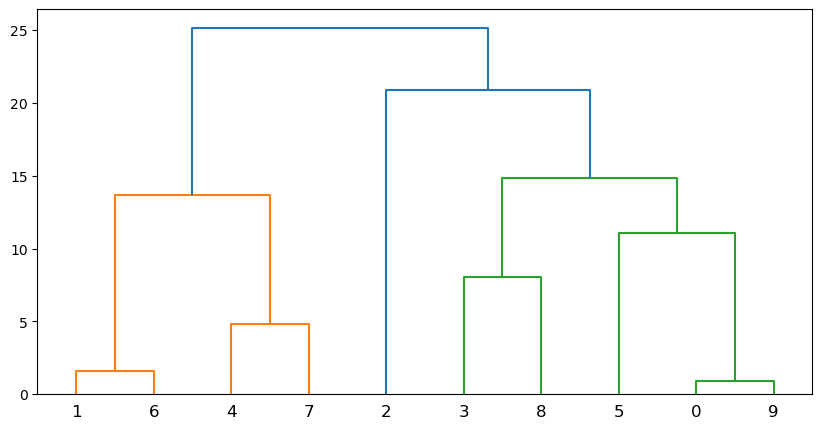

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix using Ward's method
Z = linkage(matrix_euclidean, 'ward') 

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

* Datos Normalizados

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_51165/548979305.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix_euclidean_norm, 'ward')


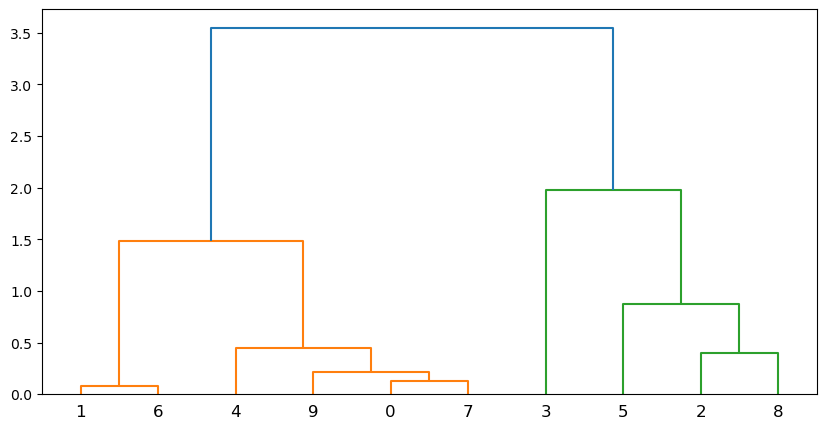

In [31]:
# Compute the linkage matrix using Ward's method
Z = linkage(matrix_euclidean_norm, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

* Datos Escalados

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_51165/1956143986.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(matrix_euclidean_norm, 'ward')


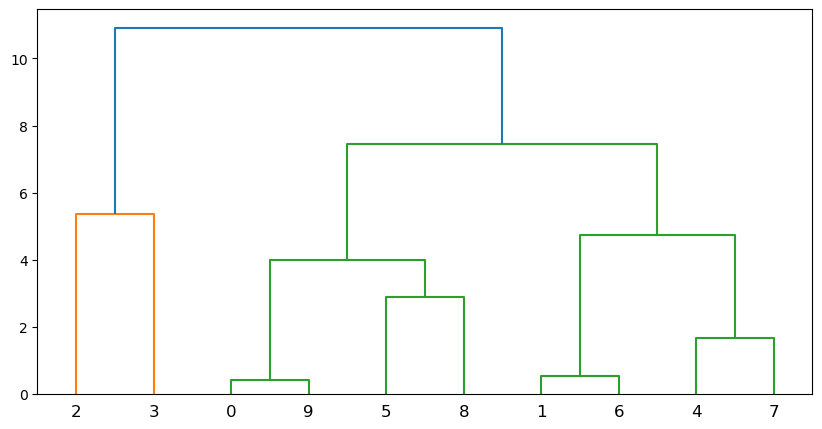

In [32]:
sc = StandardScaler()
datos_norm = sc.fit_transform(numeric_movies)
matrix_euclidean_norm = distance_matrix(datos_norm, datos_norm, p=2)

# Compute the linkage matrix using Ward's method
Z = linkage(matrix_euclidean_norm, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

### i. ¿Qué diferencias puede encontrar en los resultados previos?

Notemos que a diferencia de los datos originales y los datos normalizados, las alturas del dendrograma cambia dependiendo también del tipo de normalización. En este caso la altura mínima la tiene la Normalización de los datos (cada uno con norma 1), posteriormente la estandarización (media cero y varianza uno). Al final en todos cambian los clústers.

### ii. ¿En qué casos resulta importante llevar a cabo un proceso de normalización del rango de datos?

En el caso de que queramos implementar algún modelo de Machine Learning la normalización puede ayudar a mejorar la precisión del modelo y reducir la influencia de las variables con rangos de valores más grandes. Así mismo el escalar nuestros datos resulta importante si lo que haremos será comparar columnas que tienen datos en diferente magnitud.

En estos casos el Normalizer lo que hace es normalizar nuestros datos llevándolos a una norma de uno (esto es útil en agrupamiento o análisis de similitud). Esto con la finalidad que que aquellos valores más grandes no dominen a los más pequeños. Por otra parte StandardScaler lo que hace es pasar nuestros datos a media cero y desviación estándar 1, esto para tener nuestros datos distribuidos normalmente (esto es útil en estadística o en modelos que asumen normalidad).

### iii. Consulte los diferentes tipos de distancias que se pueden usar como parámetro en el método “linkage”, ¿En qué características de los datos se podría basar uno para elegir una determinada distancia?.

Basandonos en las características de nuestros datos podemos elegir una cierta métrica dentro de nuestro método "*linkage*", esto en general nos dice que tipo de distancia tomará para medir esta misma entre dos puntos (el parámetro *metric*, únicamente es usado cuando pasamos nuestros datos aún como una matrix con nuestros vectores (no de distancias)). 

* Si notamos que nuestros datos tienen valores atípicos, una métrica como las distancias Euclidianas o Manhattan no servirán de mucho (esto porque la media no es un valor representativo de la columna). En este caso es mejor Mahalanobis, etc.